# 2. Real Data: Comparative Analysis

In [1]:
# Load a real dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [2]:
diabetes_dataset.keys()
dir(diabetes_dataset)
print(diabetes_dataset.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
# Create a 80/20 train/test split
from sklearn.model_selection import train_test_split

X = diabetes_dataset.data
y = diabetes_dataset.target
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number samples in training:", len(y_train))
print("Number samples in testing:", len(y_test))

Number samples in training: 353
Number samples in testing: 89


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
def evaluation_error(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    errors = mean_squared_error(y_test_predict, y_test)
    return errors

def train_error(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    errors = mean_squared_error(y_train_predict, y_train)
    return errors


lr_model = linear_model.LinearRegression()
lr_error = train_error(lr_model, X_train, y_train, X_test, y_test)

ridge_model = linear_model.Ridge(alpha=0.5)
ridge_error = train_error(ridge_model, X_train, y_train, X_test, y_test)

lasso_model = linear_model.Lasso(alpha=0.5)
lasso_error = train_error(lasso_model, X_train, y_train, X_test, y_test)

poly_features = PolynomialFeatures(degree=4, include_bias = False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


poly_error = evaluation_error(lr_model, X_train_poly, y_train, X_test_poly, y_test)
poly_error_train = train_error(lr_model, X_train_poly, y_train, X_test_poly, y_test)

print("Linear Mean squared error", lr_error)
print("Ridge Mean squared error", ridge_error)
print("Lasso Mean squared error", lasso_error)
print("Polynomial Mean squared error", poly_error)
print("Polynomial train error", poly_error_train)


Linear Mean squared error 2868.546584216565
Ridge Mean squared error 3115.584377168976
Lasso Mean squared error 3271.22985697533
Polynomial Mean squared error 146911.30546507554
Polynomial train error 1.6221252788656565e-22


#### Write-up
Linear Mean squared error 2900.1732878832318<br>
Ridge Mean squared error 2917.174211082088<br>
Lasso Mean squared error 2945.147845137908<br>
Polynomial Mean squared error 146911.30546507554<br>

Among these four models, linear regression model performs best and polynomial model performs worst. Comparing the train MSE and evaluation MSE of polynomial model, we can find that the train MSE is small while the evaluation MSE is extremely big. The reason why polynomial model performs worst is that it's overfitting.

Linear regression performs better than ridge and lasso models here. According to graphs below, we can see that 0.5 is not the best regularization strength. When I try to use 0.1 as regularization strength, ridge and lasso models performs better than linear regression model.

# 3. Real Data: Tuning Hyperparameters for Regularized Models

/Users/ting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Users/ting/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ting/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


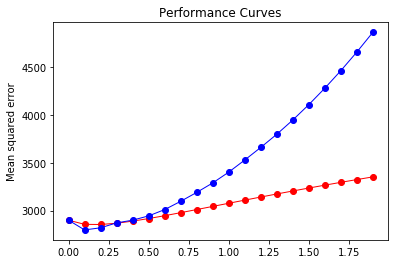

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
alpha = 0

ridge_error, lasso_error, alpha_list = [], [], []
for m in range(20):
    
    alpha_list.append(alpha)
    ridge_model = linear_model.Ridge(alpha=alpha)
    lasso_model = linear_model.Lasso(alpha=alpha)
    ridge_error.append(evaluation_error(ridge_model, X_train, y_train, X_test, y_test))
    lasso_error.append(evaluation_error(lasso_model, X_train, y_train, X_test, y_test))
    alpha += 0.1
        
plt.plot(alpha_list, ridge_error, 'o-', color="r", linewidth=1, label="ridge")
plt.plot(alpha_list, lasso_error, 'o-', color="b", linewidth=1, label="lasso")
plt.ylabel('Mean squared error')
plt.title('Performance Curves')
plt.show()


#### Write-up
When varying the regularization strength, we can see that the mean squared error changes accordingly. It means that we can improve the performance by changing the reguralization parameter.

Ridge model performs better than lasso model. The red curve represents ridge model and the blue curve represents lasso model. From above graph, we can read that ridge MSE is smaller than lasso MSE in most cases.